In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split

In [4]:
from getdata import *

df_a = get_csvdata_ADNI()
df_o= get_csvdata(drop_young=False, drop_contradictions=False)

df_a

,Image Data ID,ID,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I167590,002_S_0295,CN,M,85,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,4/18/2006,MGH,8/23/2022
2,I252117,002_S_0413,CN,F,76,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,5/02/2006,MGH,8/23/2022
7,I252119,002_S_0559,CN,M,79,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,5/23/2006,MGH,8/23/2022
11,I173018,002_S_0619,AD,M,78,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,6/01/2006,MGH,8/23/2022
13,I172953,002_S_0685,CN,F,90,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,7/06/2006,MGH,8/23/2022
...,...,...,...,...,...,...,...,...,...,...,...,...
2871,I173864,941_S_1202,CN,M,78,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,1/30/2007,MGH,8/23/2022
2875,I185313,941_S_1203,CN,M,83,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,1/29/2007,MGH,8/23/2022
2878,I173183,941_S_1295,MCI,M,77,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,2/09/2007,MGH,8/23/2022
2880,I173269,941_S_1311,MCI,M,69,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,3/02/2007,MGH,8/23/2022


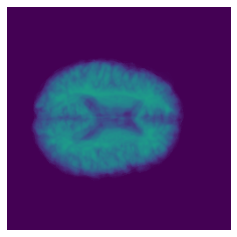

In [5]:
img_a = get_slices_ADNI(df_a["ID"][:10], N=0, dim=2, normalize=True, m=90)
from EDA.EDA_functions import *
img_mean(img_a, vmax=1)

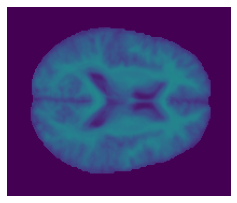

In [6]:
img_o = get_slices(df_o["ID"][:10], N=0, dim=2, normalize=True, m=90)
img_mean(img_o, vmax=1)

In [7]:
all_adni = get_slices_ADNI(df_a["ID"][0], N=0, dim=2, normalize=True, m=90)
all_adni.shape

FileNotFoundError: [Errno 2] No such file or directory: '../data/ADNI_Freesurfer/ADNI/0/FreeSurfer_Longitudinal_Processing_brainmask/'

In [ ]:
df = pd.read_csv("../data/ADNI_Freesurfer/FreeSurfer_8_23_2022.csv").sort_values(["Subject","Description"])
df.rename(columns={"Subject":"ID"}, inplace=True)
df= df[(df["Description"] != "FreeSurfer Cross-Sectional Processing aparc+aseg") & (df["Description"] != "FreeSurfer Longitudinal Processing aparc+aseg")]
image_IDs = []
df.head(10)

,Image Data ID,ID,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I167590,002_S_0295,CN,M,85,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,4/18/2006,MGH,8/23/2022
2,I252117,002_S_0413,CN,F,76,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,5/02/2006,MGH,8/23/2022
7,I252119,002_S_0559,CN,M,79,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,5/23/2006,MGH,8/23/2022
6,I205156,002_S_0559,CN,M,79,1,MRI,FreeSurfer Longitudinal Processing brainmask,Post-processed,5/23/2006,MGH,8/23/2022
11,I173018,002_S_0619,AD,M,78,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,6/01/2006,MGH,8/23/2022
10,I205165,002_S_0619,AD,M,78,1,MRI,FreeSurfer Longitudinal Processing brainmask,Post-processed,6/01/2006,MGH,8/23/2022
13,I172953,002_S_0685,CN,F,90,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,7/06/2006,MGH,8/23/2022
12,I196647,002_S_0685,CN,F,90,1,MRI,FreeSurfer Longitudinal Processing brainmask,Post-processed,7/06/2006,MGH,8/23/2022
19,I177712,002_S_0729,MCI,F,65,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,7/17/2006,MGH,8/23/2022
17,I210015,002_S_0729,MCI,F,65,1,MRI,FreeSurfer Longitudinal Processing brainmask,Post-processed,7/17/2006,MGH,8/23/2022


In [ ]:
for i in df["ID"].unique():
    print(i)
    print(df[df["ID"]==i]["Image Data ID"])
    image_IDs.append(df[df["ID"]==i]["Image Data ID"].iloc[0])
df= df.loc[df["Image Data ID"].isin(image_IDs)]
df

002_S_0295
0    I167590
Name: Image Data ID, dtype: object
002_S_0413
2    I252117
Name: Image Data ID, dtype: object
002_S_0559
7    I252119
Name: Image Data ID, dtype: object
002_S_0619
11    I173018
Name: Image Data ID, dtype: object
002_S_0685
13    I172953
Name: Image Data ID, dtype: object
002_S_0729
19    I177712
Name: Image Data ID, dtype: object
002_S_0782
21    I177728
Name: Image Data ID, dtype: object
002_S_0816
25    I177744
Name: Image Data ID, dtype: object
002_S_0938
29    I178763
Name: Image Data ID, dtype: object
002_S_0954
31    I210021
Name: Image Data ID, dtype: object
002_S_0955
34    I190063
Name: Image Data ID, dtype: object
002_S_1018
37    I210043
Name: Image Data ID, dtype: object
002_S_1070
41    I178784
Name: Image Data ID, dtype: object
002_S_1155
42    I177778
Name: Image Data ID, dtype: object
002_S_1261
47    I177832
Name: Image Data ID, dtype: object
002_S_1268
48    I178822
Name: Image Data ID, dtype: object
002_S_1280
52    I177857
Name: Image Data I

,Image Data ID,ID,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I167590,002_S_0295,CN,M,85,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,4/18/2006,MGH,8/23/2022
2,I252117,002_S_0413,CN,F,76,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,5/02/2006,MGH,8/23/2022
7,I252119,002_S_0559,CN,M,79,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,5/23/2006,MGH,8/23/2022
11,I173018,002_S_0619,AD,M,78,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,6/01/2006,MGH,8/23/2022
13,I172953,002_S_0685,CN,F,90,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,7/06/2006,MGH,8/23/2022
...,...,...,...,...,...,...,...,...,...,...,...,...
2871,I173864,941_S_1202,CN,M,78,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,1/30/2007,MGH,8/23/2022
2875,I185313,941_S_1203,CN,M,83,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,1/29/2007,MGH,8/23/2022
2878,I173183,941_S_1295,MCI,M,77,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,2/09/2007,MGH,8/23/2022
2880,I173269,941_S_1311,MCI,M,69,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,3/02/2007,MGH,8/23/2022
